# Importing the required Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [2]:
df=pd.read_csv('hotel_bookings.csv')

# Exploratory Data Analysis and Data Cleaning

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
df.shape

(119390, 32)

In [6]:
 df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# converting object data to date data for reservation_status_date
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [9]:
# To check the descriptive analysis of categorical data
object_data=df.describe(include='object')

In [10]:
object_data

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [11]:
# Printing the unique values of each column
for col in object_data.columns:
    print(col)
    print(df[col].unique())
    print('-'*70)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LK

In [12]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
# Dropping the columns which have large null values
df.drop(['company','agent'],inplace=True,axis=1)

In [14]:
# Dropping the rows which have large null values
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [16]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [17]:
# Removing the outlier of adr column
df=df[df['adr']<5000]

In [18]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


# Data Analysis and Visualizations

In [19]:
# Checking the cancellation percentage of hotels
canceled_percen = df['is_canceled'].value_counts(normalize=True).round(2)

In [20]:
canceled_percen

0    0.63
1    0.37
Name: is_canceled, dtype: float64

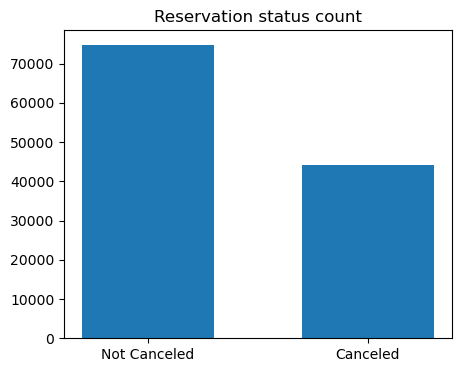

In [21]:
# plotting the bar of their count
plt.figure(figsize=(5,4))
plt.title('Reservation status count')
plt.bar(['Not Canceled','Canceled'],df['is_canceled'].value_counts(),width=0.6)
plt.show()

The bar graph shows the percentage of reservations that are canceled and those that are not. It is obivious that there are a significant number of reservations that have not been canceled but there are still 37% of customers who canceled their reservation, which led to significant impact on the hotel's earnings.

In [47]:
# count of most preferred hotels by customers
preferred_hotel=df['hotel'].value_counts()
preferred_hotel

City Hotel      79301
Resort Hotel    39596
Name: hotel, dtype: int64

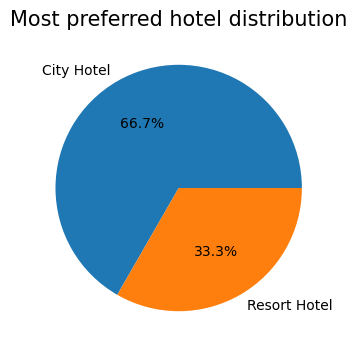

In [52]:
plt.figure(figsize=(4,4))
plt.title('Most preferred hotel distribution',size=15)
plt.pie(preferred_hotel,labels=preferred_hotel.index,autopct='%0.1f%%')
plt.show()

City hotels are most preferred hotel by guests.

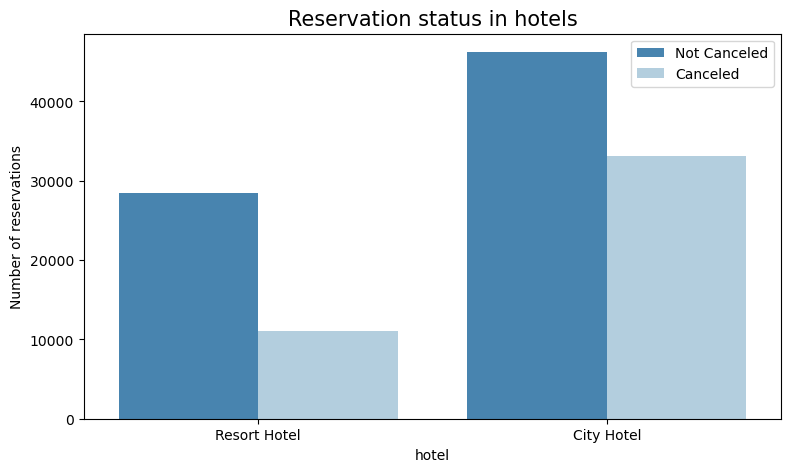

In [22]:
# plotting the reservation percentage of each hotel type
plt.figure(figsize=(9,5))
sns.countplot(x='hotel',hue='is_canceled',data=df,palette='Blues_r')
plt.title('Reservation status in hotels',size=15)
plt.xlabel('hotel')
plt.ylabel('Number of reservations')
plt.legend(['Not Canceled','Canceled'])
plt.show()

The countplot shows that in resort hotels the difference between reservation and cancellation is slightly large than that of city hotels which means that resort hotels faces less cancellation than city hotels. In comparison to resort hotels, city hotels have more bookings. it's possible that resort hotels are more expensive.  

In [54]:
# percentage of repeated guests
repeated_guest=df['is_repeated_guest'].value_counts(normalize=True).round(2)
repeated_guest

0    0.97
1    0.03
Name: is_repeated_guest, dtype: float64

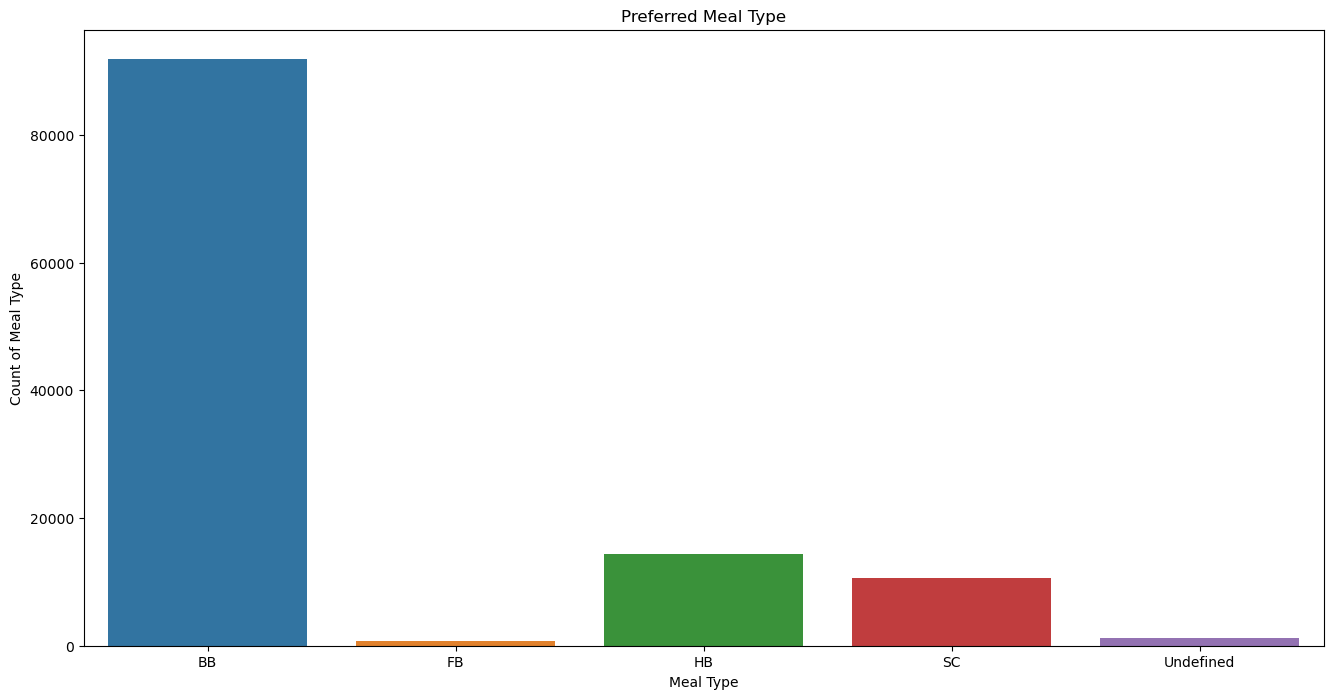

In [55]:
plt.figure(figsize=(16,8))
sns.countplot(df['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count of Meal Type')
plt.title('Preferred Meal Type')
plt.show()

From the graph I can draw that BB is the most preferred meal.

In [23]:
# cancellation percentage of resort hotel
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True).round(2)

0    0.72
1    0.28
Name: is_canceled, dtype: float64

In [24]:
# cancellation percentage of city hotel
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True).round(2)

0    0.58
1    0.42
Name: is_canceled, dtype: float64

In [25]:
# average of adr on reservation_status_date
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()

In [26]:
resort_hotel

,adr
reservation_status_date,
2014-11-18,0.000000
2015-01-01,61.966667
2015-01-02,9.633750
2015-01-18,0.000000
2015-01-21,37.301209
...,...
2017-09-08,101.012500
2017-09-09,147.778333
2017-09-10,145.272500


In [27]:
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

In [28]:
city_hotel

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-20,76.500000
2015-01-30,61.400000
2015-02-17,76.500000
...,...
2017-09-03,137.172600
2017-09-04,116.925385
2017-09-05,154.000000


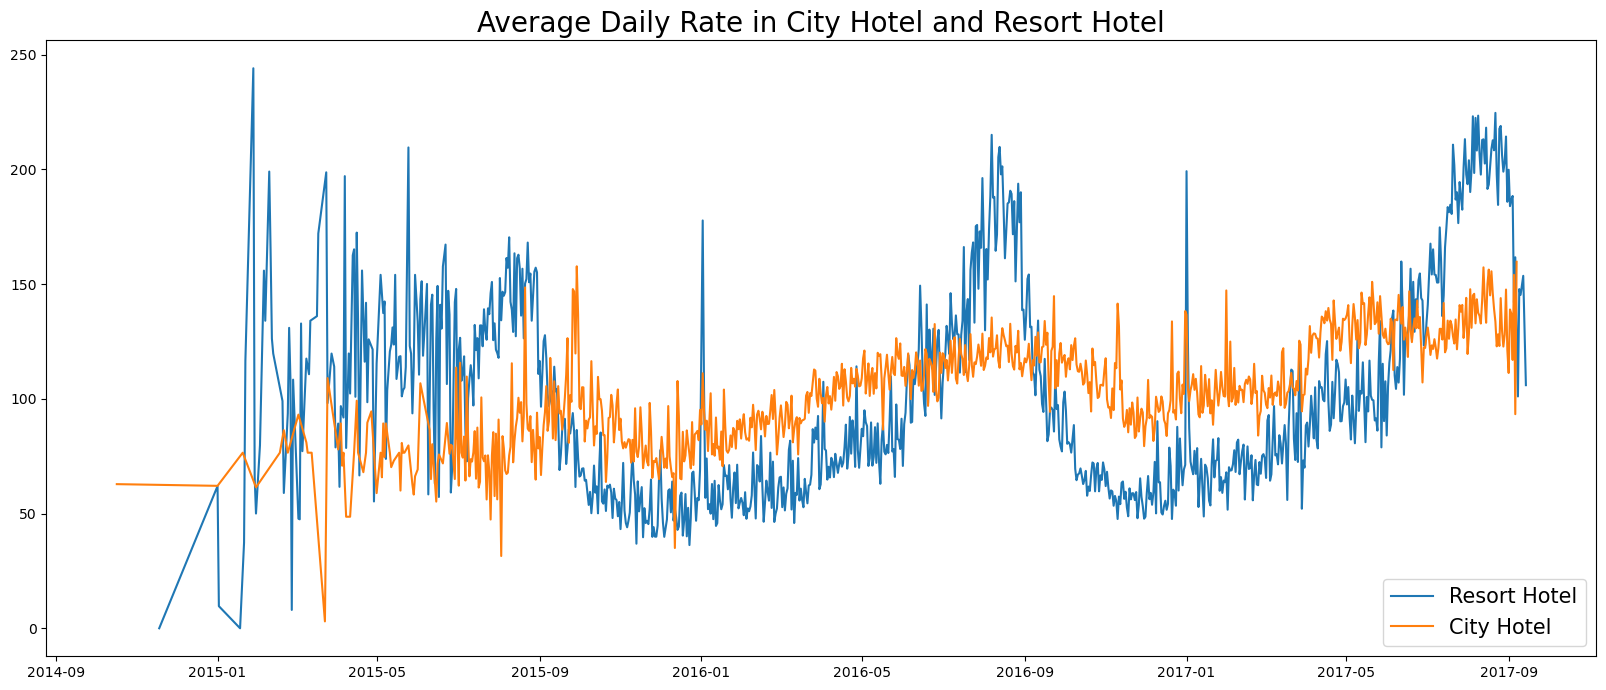

In [29]:
# adr of hotels over a period of time
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City Hotel and Resort Hotel',size=20)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='City Hotel')
plt.legend(fontsize=15)
plt.show()

The line graph shows that on certain days, the average daily rate for a city hotel is less than that of a resort hotel, and on other days, it is even less. It may be possible that on weekends and holiday may see rise in resort hotel price.

In [30]:
df['month']=df['reservation_status_date'].dt.month

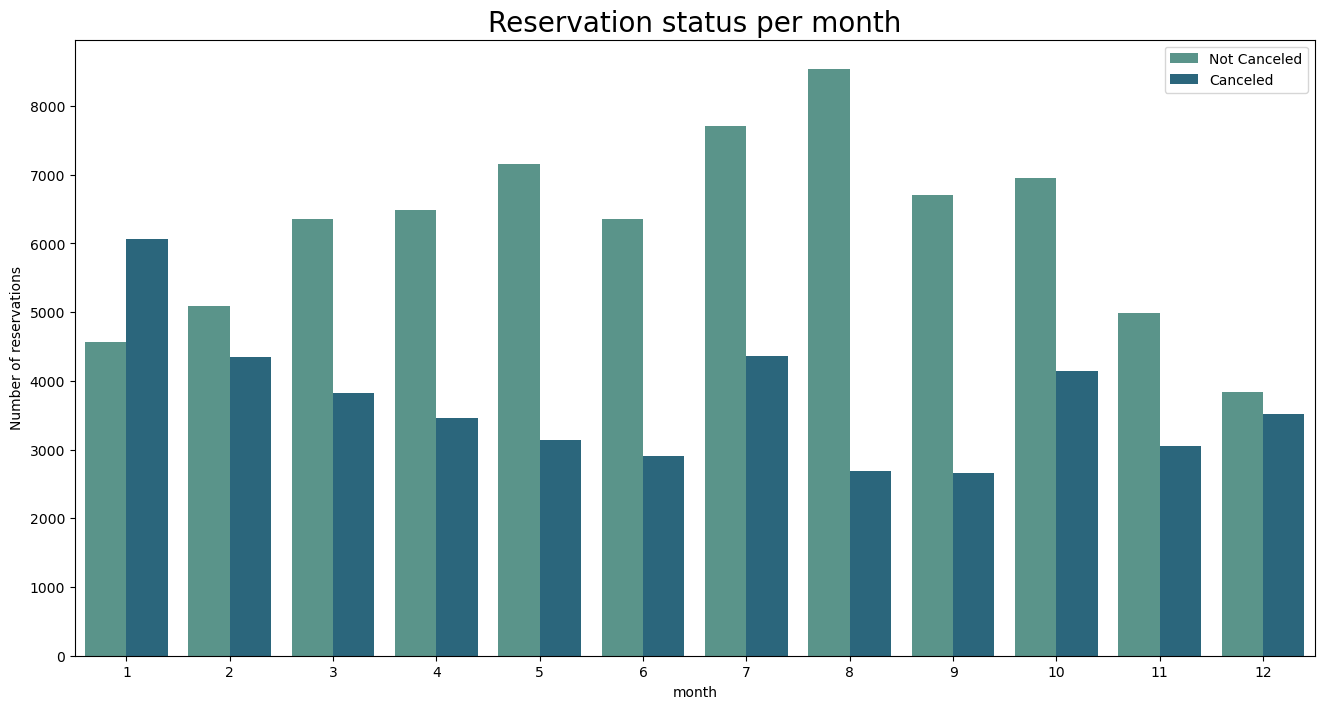

In [31]:
# checking the cancellation against reservation
plt.figure(figsize=(16,8))
sns.countplot(x='month',hue='is_canceled',data=df,palette='crest')
plt.title('Reservation status per month',size=20)
plt.xlabel('month')
plt.ylabel('Number of reservations')
plt.legend(['Not Canceled','Canceled'])
plt.show()

As it can be seen that the no. of confirmed reservations and no. of canceled reservations is highest in the month of August, whereas January has the highest canceled reservations.

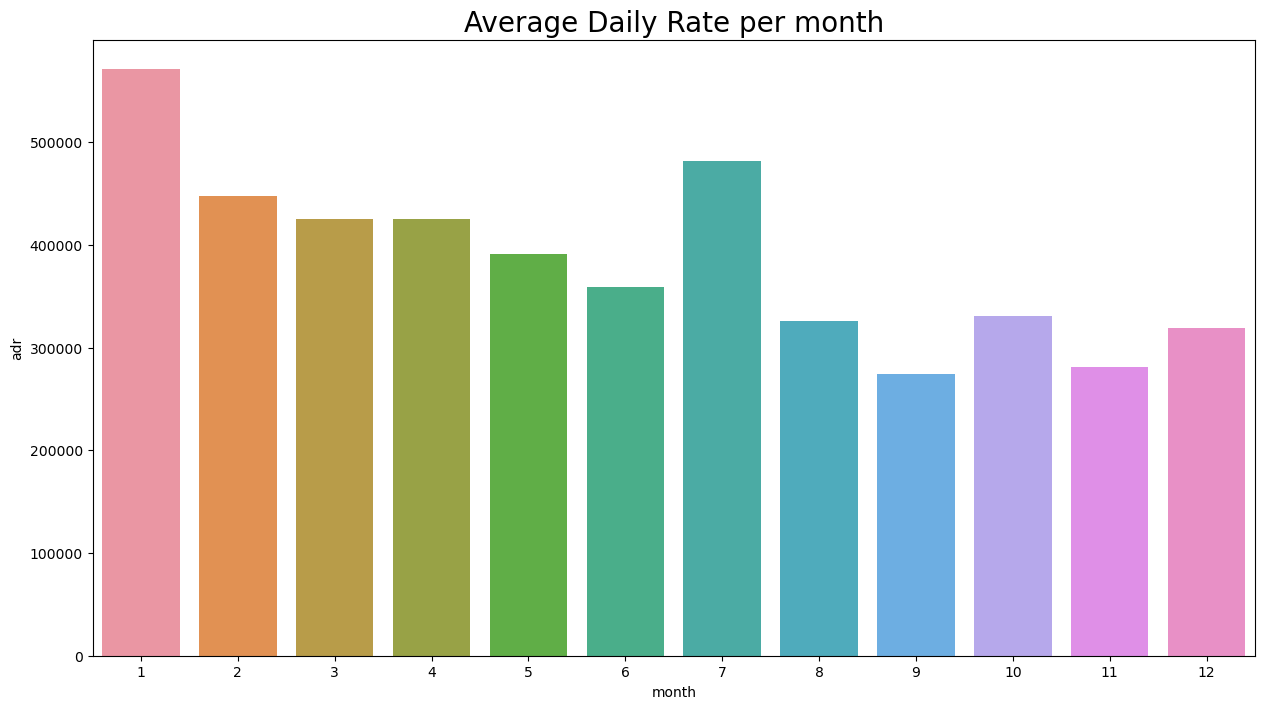

In [32]:
# checking whether the adr affecting the cancellation
plt.figure(figsize=(15,8))
plt.title('Average Daily Rate per month',size=20)
sns.barplot(x='month',y='adr',data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.show()

From the graph it can be concluded that cancellations are occur when the prices are high. Therefore, we can say that the cost of accomodation is solely responsible for cancellation.

In [33]:
# countries with most cancellation 
canceled=df[df['is_canceled']==1]
top_country=canceled['country'].value_counts()[:10]
top_country

PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: country, dtype: int64

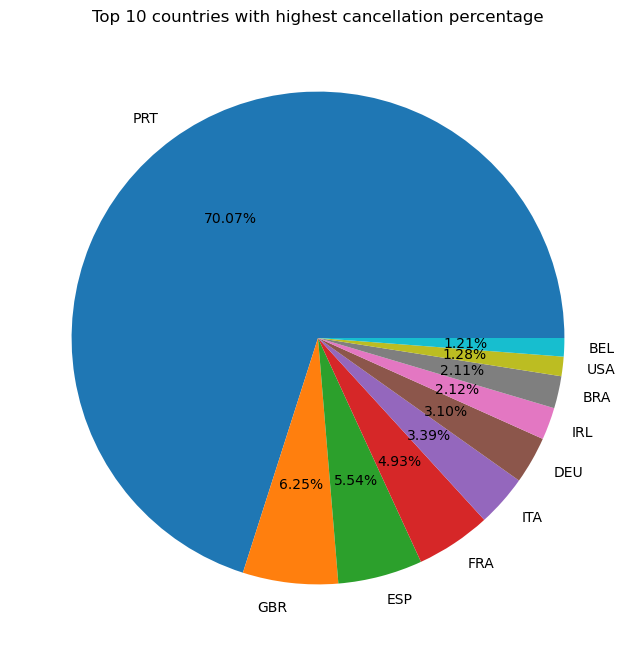

In [34]:
plt.figure(figsize=(8,8))
plt.title('Top 10 countries with highest cancellation percentage')
plt.pie(top_country,autopct='%0.2f%%',labels=top_country.index)
plt.show()

From pie chart it is clear Portugal has the highest cancellation percentage

In [35]:
# booking through different market
df['market_segment'].value_counts(normalize=True).round(2)

Online TA        0.47
Offline TA/TO    0.20
Groups           0.17
Direct           0.10
Corporate        0.04
Complementary    0.01
Aviation         0.00
Name: market_segment, dtype: float64

In [36]:
# cancellation percentage of different market
canceled['market_segment'].value_counts(normalize=True).round(2)

Online TA        0.47
Groups           0.27
Offline TA/TO    0.19
Direct           0.04
Corporate        0.02
Complementary    0.00
Aviation         0.00
Name: market_segment, dtype: float64

In [37]:
# adr of canceled hotel is high or low
canceled_adr=canceled.groupby('reservation_status_date')[['adr']].mean()
canceled_adr.reset_index(inplace=True)
canceled_adr.sort_values('reservation_status_date',inplace=True)
canceled_adr

,reservation_status_date,adr
0,2014-10-17,62.800000
1,2014-11-18,0.000000
2,2015-01-01,62.062779
3,2015-01-02,9.633750
4,2015-01-18,0.000000
...,...,...
897,2017-08-26,178.200000
898,2017-08-27,167.300000
899,2017-08-28,81.416667
900,2017-08-29,144.253333


In [38]:
# adr of not canceled hotel is high or low
not_canceled=df[df['is_canceled']==0]
not_canceled_adr=not_canceled.groupby('reservation_status_date')[['adr']].mean()
not_canceled_adr.reset_index(inplace=True)
not_canceled_adr.sort_values('reservation_status_date',inplace=True)
not_canceled_adr

,reservation_status_date,adr
0,2015-07-01,31.650000
1,2015-07-02,95.924000
2,2015-07-03,97.645205
3,2015-07-04,110.480000
4,2015-07-05,100.308485
...,...,...
800,2017-09-08,101.012500
801,2017-09-09,147.778333
802,2017-09-10,145.272500
803,2017-09-12,153.570000


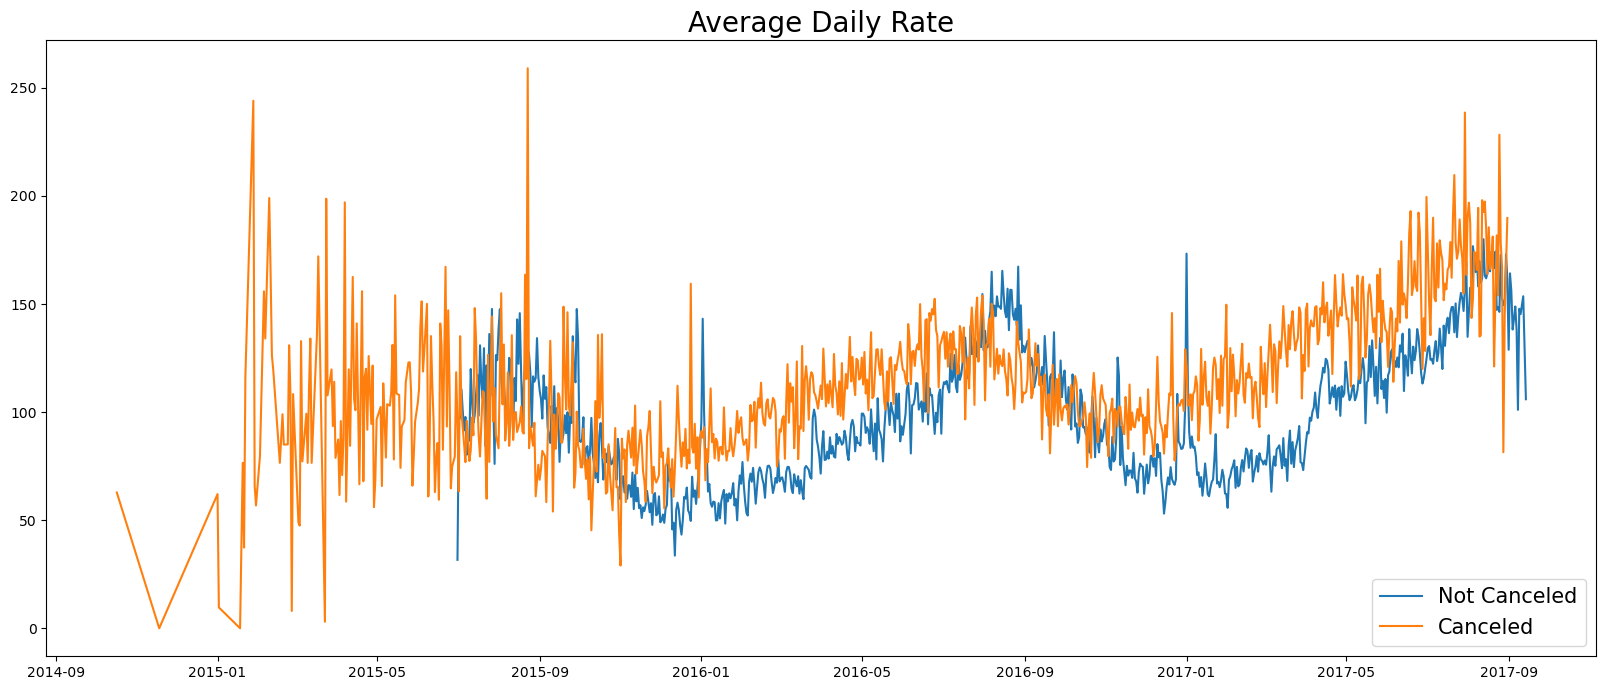

In [39]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate',size=20)
plt.plot(not_canceled_adr['reservation_status_date'],not_canceled_adr['adr'],label='Not Canceled')
plt.plot(canceled_adr['reservation_status_date'],canceled_adr['adr'],label='Canceled')
plt.legend(fontsize=15)
plt.show()

In [40]:
canceled_adr=canceled_adr[(canceled_adr['reservation_status_date']>'2016') & (canceled_adr['reservation_status_date']<'2017-09')]
not_canceled_adr=not_canceled_adr[(not_canceled_adr['reservation_status_date']>'2016') & (not_canceled_adr['reservation_status_date']<'2017-09')]

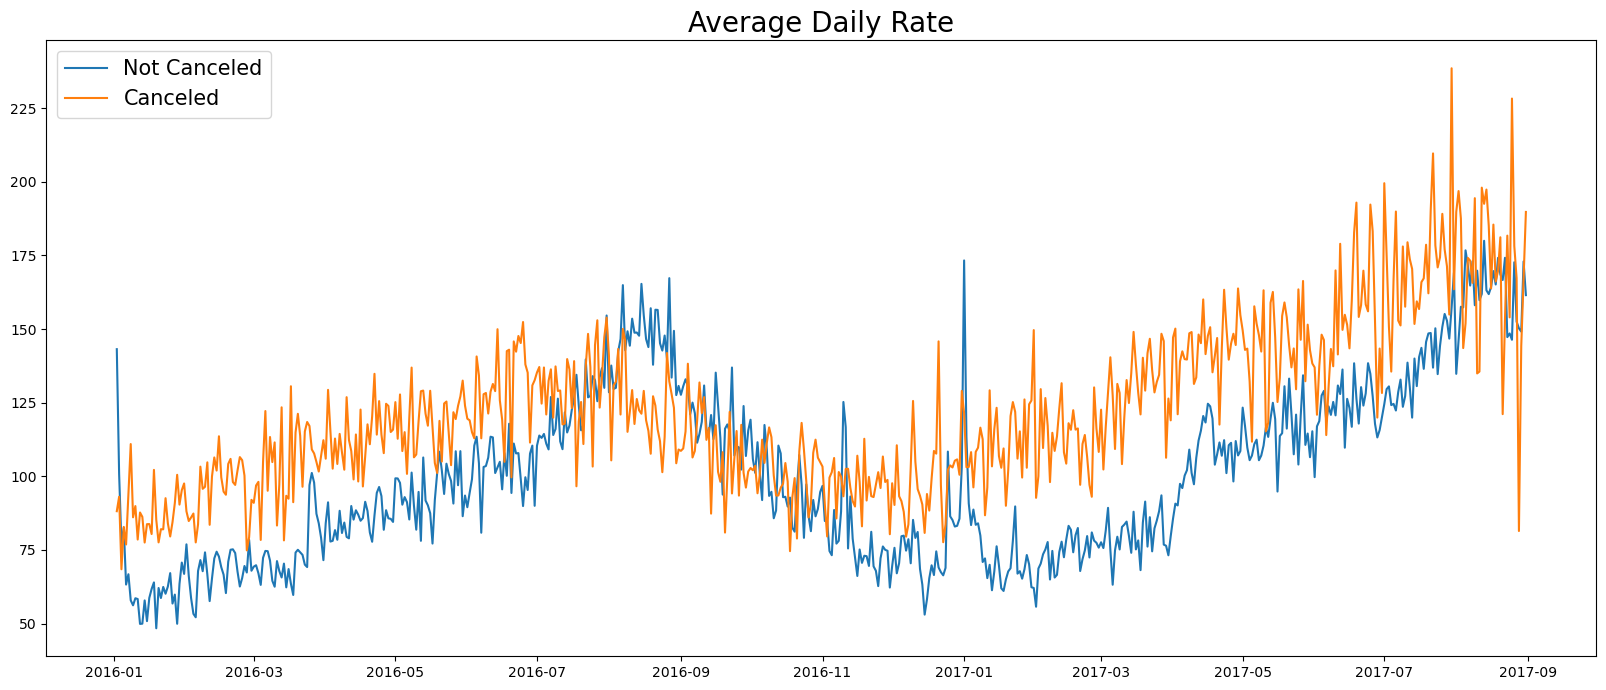

In [41]:
# As we can see that when the adr is high then the cancellation is high
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate',size=20)
plt.plot(not_canceled_adr['reservation_status_date'],not_canceled_adr['adr'],label='Not Canceled')
plt.plot(canceled_adr['reservation_status_date'],canceled_adr['adr'],label='Canceled')
plt.legend(fontsize=15)
plt.show()

This line graph certifies that the higher hotel price leads to higher cancellation.

Cancellation rates increases when price increases. In order to prevent cancellations of reservations, hotels could work on their pricing strategies and try to lower the price for specific hotels based on locations. They can also provide some discounts to the customers.

As the ratio of confirmed reservation and cancellation of the resort hotels are higher than city hotels. So the hotels should provide a resonable discount on the prices or initiate some offer on weekends or on holidays.

In the month of January, hotels can start campaings or marketing through various portals with a resonable amount to increase their revenue and profit.

They can also increase the quality of their hotel services particularly in Portugal to reduce the cancellation rates.

In order to retain guests, the management should take care of feebacks from customers and improve the quality of other meal type than BB.